In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
ch=fetch_california_housing()

In [4]:
type(ch)

sklearn.utils._bunch.Bunch

In [5]:
ch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(ch.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


# Creating Dataset

In [8]:
dataset=pd.DataFrame(ch.data,columns=ch.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset['price']=ch.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
dataset.describe() # summerizing stats (only numeric)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

# EDA 
## Co-relate

In [13]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
# sns.pairplot(dataset)

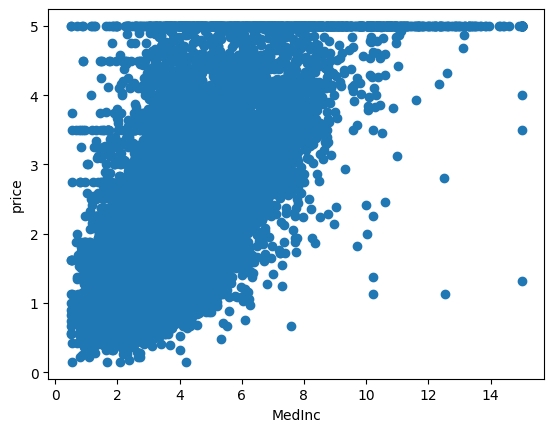

In [15]:
plt.scatter(dataset.MedInc,dataset.price);
plt.xlabel('MedInc')
plt.ylabel('price');

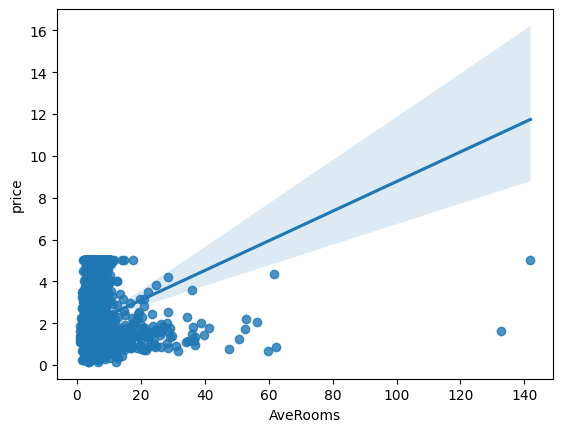

In [16]:
sns.regplot(data=dataset,x='AveRooms',y='price');

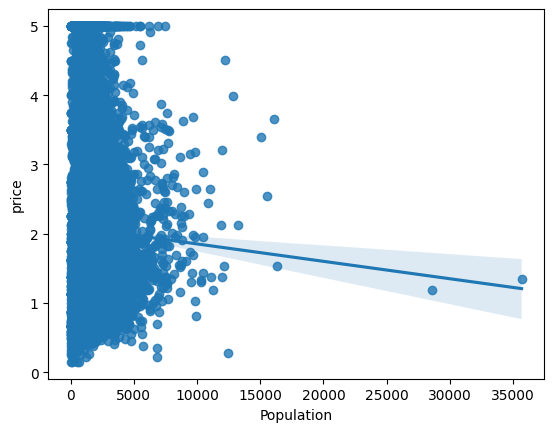

In [17]:
sns.regplot(data=dataset,x='Population',y='price');

## Split

In [18]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [19]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9473,3.2156,10.0,5.390501,1.096306,2111.0,2.784960,39.46,-123.40
18978,4.6779,16.0,5.875000,0.983696,792.0,4.304348,38.25,-122.01
5499,3.1603,14.0,3.855828,1.206544,2355.0,2.407975,34.00,-118.42
5521,5.8143,45.0,5.174905,0.958175,581.0,2.209125,33.96,-118.39
18562,2.9712,52.0,10.105105,1.933934,796.0,2.390390,37.00,-122.04
...,...,...,...,...,...,...,...,...
10255,3.5667,28.0,4.616343,1.041551,2026.0,2.806094,33.88,-117.87
35,1.4861,49.0,4.602273,1.068182,570.0,2.159091,37.83,-122.27
18704,3.5347,23.0,5.430952,0.971429,1164.0,2.771429,40.56,-122.38
12721,7.3343,37.0,7.097500,0.975000,1006.0,2.515000,38.58,-121.37


In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [44]:
import pickle

pickle.dump(scaler,open('scaling.pkl','wb'))

In [25]:
x_train

array([[-3.42660385e-01, -1.47876016e+00, -1.62389110e-02, ...,
        -2.64940664e-02,  1.78335958e+00, -1.90253014e+00],
       [ 4.29578833e-01, -1.00080559e+00,  1.73451435e-01, ...,
         9.75005335e-02,  1.21764461e+00, -1.20994128e+00],
       [-3.71864261e-01, -1.16012378e+00, -6.17092294e-01, ...,
        -5.72591625e-02, -7.69370779e-01,  5.78831367e-01],
       ...,
       [-1.74143983e-01, -4.43191928e-01, -4.01559472e-04, ...,
        -2.75983775e-02,  2.29764591e+00, -1.39429947e+00],
       [ 1.83242111e+00,  6.72035393e-01,  6.52083179e-01, ...,
        -4.85250733e-02,  1.37193051e+00, -8.91051451e-01],
       [ 1.63977058e+00, -8.41487400e-01,  8.43799188e-01, ...,
         2.09853545e-02, -7.78721440e-01,  7.93085473e-01]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
len(model.coef_),len(x.columns)

(8, 8)

In [30]:
model.intercept_

2.061633826827247

In [31]:
#print parameters 
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
reg_pred=model.predict(x_test)

In [33]:
reg_pred[:100]

array([2.59142815, 2.9937362 , 2.08205273, 1.16063088, 2.66152691,
       0.70369785, 0.56185616, 1.9434029 , 2.23688697, 2.00987906,
       2.83142362, 3.78971558, 1.26905192, 2.83953804, 1.97888351,
       0.82221734, 0.78853788, 2.59000592, 1.66670431, 3.33256129,
       3.03726476, 1.60439676, 0.91426262, 1.4931337 , 2.37690757,
       2.27813138, 1.43025808, 1.21685301, 1.85406538, 2.14784221,
       1.77723294, 2.14407174, 1.55409549, 1.39693855, 2.11379938,
       1.74880793, 3.1478693 , 1.03741057, 3.09659699, 1.73088725,
       1.23991029, 2.11206107, 1.13957126, 3.00786668, 1.64853108,
       3.49916593, 1.87137043, 0.93120063, 1.45408299, 1.88624861,
       1.77316821, 2.83148732, 2.18743737, 1.98855853, 1.15164387,
       3.27963969, 1.44766283, 2.85682685, 1.72566925, 1.5007795 ,
       4.86078142, 1.34670496, 0.73640508, 2.61058745, 1.96701524,
       2.76253613, 2.09907547, 1.40360873, 1.11326213, 2.32291309,
       1.61458709, 2.9424291 , 2.49431168, 1.82891466, 1.19908

# Assumptions

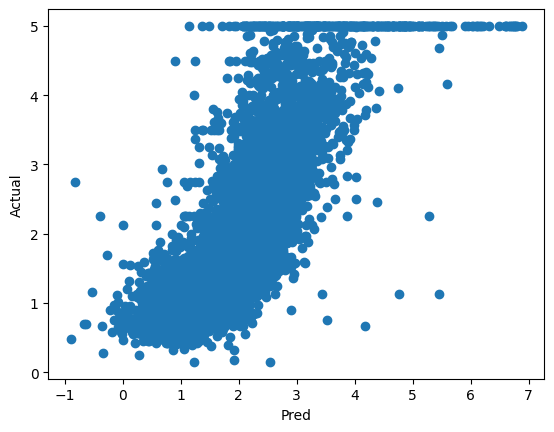

In [34]:
#Scatter
plt.scatter(reg_pred,y_test)
plt.xlabel('Pred')
plt.ylabel('Actual');

In [35]:
# residuals
residuals=y_test-reg_pred

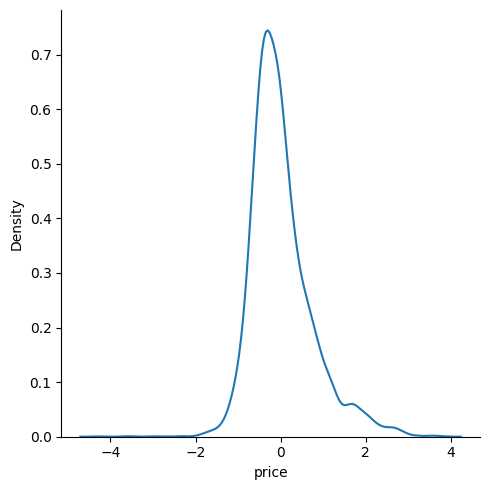

In [36]:
sns.displot(residuals,kind='kde');

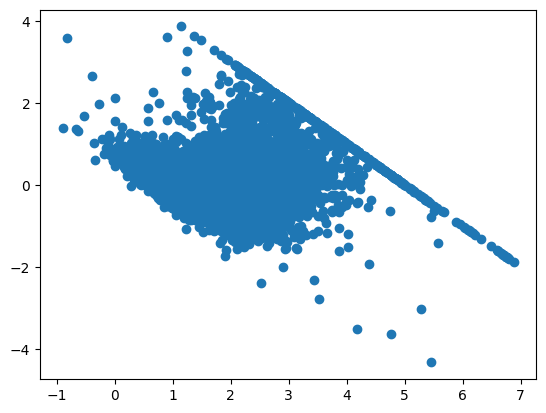

In [37]:
# scatter with pred & residuals
plt.scatter(reg_pred,residuals);

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5299937100804559
0.5338770004610863
0.7280066689807559


## R^2 = 1-SSR/SST 
### SSR-sum of squares of residuals
### SST-total sum of squares

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.6118754766807346

## Adjusted R^2 = 1-[(1-r2)*(n-1)/(n-k-1)] , n-nos of obervation,k-nos. of predictor vars

In [40]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6113732938913841

## New Data

In [41]:
ch.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [42]:
model.predict(ch.data[0].reshape(1,-1))

array([84.15901382])

# Pickle deployment

In [60]:
import pickle

In [61]:
pickle.dump(model,open('reg_model.pkl','wb'))

In [62]:
pickle_model=pickle.load(open('reg_model.pkl','rb'))

In [63]:
pickle_model.predict(ch.data[0].reshape(1,-1))

array([86.57376664])